In [69]:
import pickle
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.stem import porter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [96]:
true_df = pickle.load(open("pickle_files/true_df.pkl", "rb" ))

In [7]:
corpus = pickle.load(open("pickle_files/corpus.pkl", "rb" ))

In [8]:
cleaned_nouns = pickle.load(open("pickle_files/cleaned_nouns.pkl", "rb" ))

In [9]:
drop_buzz_words = pickle.load(open("pickle_files/drop_buzz_words.pkl", "rb" ))

In [10]:
nouns_verbs_adjs = pickle.load(open("pickle_files/nouns_verbs_adjs.pkl", "rb" ))

In [11]:
Xtreme_clean = pickle.load(open("pickle_files/Xtreme_clean.pkl", "rb" ))

In [29]:
drop_net = pickle.load(open("pickle_files/drop_net.pkl", "rb" ))

In [70]:
what_the = pickle.load(open("pickle_files/what_the.pkl", "rb" ))

In [73]:
def count_letters(words):
    length = []
    for x in words:
        length.append(len(x))
    return sum(length)

In [74]:
count_letters(what_the)

14544609

In [3]:
count_vectorizer2 = CountVectorizer(ngram_range=(1, 4),  
                                   stop_words='english', 
                                   #token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)

cv_fit_tran = count_vectorizer2.fit_transform(corpus)

In [127]:
tfidf = TfidfVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)
cor_tfidf = tfidf.fit_transform(what_the)

In [128]:
lsa = TruncatedSVD(60, algorithm = 'arpack')
corpus_lsa = lsa.fit_transform(cor_tfidf)
corpus_lsa = Normalizer(copy=False).fit_transform(corpus_lsa)

In [129]:
sum(lsa.explained_variance_ratio_)

0.15239473208640264

In [130]:
terms = tfidf.get_feature_names()

In [131]:
for i, comp in enumerate(lsa.components_):
    Terms_in_Comp = zip(terms,comp)
    sorted_Terms = sorted(Terms_in_Comp, key = lambda x: x[1], reverse=True) [:10]
    print("Topic %d:" %i)
    for term in sorted_Terms:
        print(term[0])
    print(" ")

Topic 0:
alabama
influenc
share
style
alabama today
style width
state
opinion
width height
width
 
Topic 1:
googletag
div gpt
gpt
gpt ad
div
ad
display div
push
cmd
cmd push
 
Topic 2:
fox
fox news
news
health
tv
entertain
fnc
linkitem
clip
data
 
Topic 3:
ldadinit
getelementbyid
ajs
ldadinit ldadinit
ld
document
callback
document getelementbyid
com
free
 
Topic 4:
north
iran
korea
cohen
campaign
nuclear
mueller
north korea
reuters
fbi
 
Topic 5:
north
korea
north korea
korean
nuclear
iran
summit
pompeo
north korean
jong
 
Topic 6:
window
box
adid
adsdiv
origadsplid
orignetid
window origadsplid
window orignetid
break case
undefined
 
Topic 7:
null
window googletag
prelimmonth
pubdate
gun
abort
school
court
date
nation review
 
Topic 8:
north
null
korea
korean
prelimmonth
north korea
fbi
pubdate
summit
north korean
 
Topic 9:
iran
null
nuclear
deal
prelimmonth
fbi
iranian
window
russia
syria
 
Topic 10:
cell
wireless
wifi
cell phone
haspel
radiat
republican
democrat
senat
phone
 
Topic 

In [ ]:
import os

os.system('say "Your move.....Commander"')

In [89]:
SSEs = []
Sil_coefs = []
for k in range(2,61):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(corpus_lsa)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(corpus_lsa, labels, metric='euclidean'))
    SSEs.append(km.inertia_) 

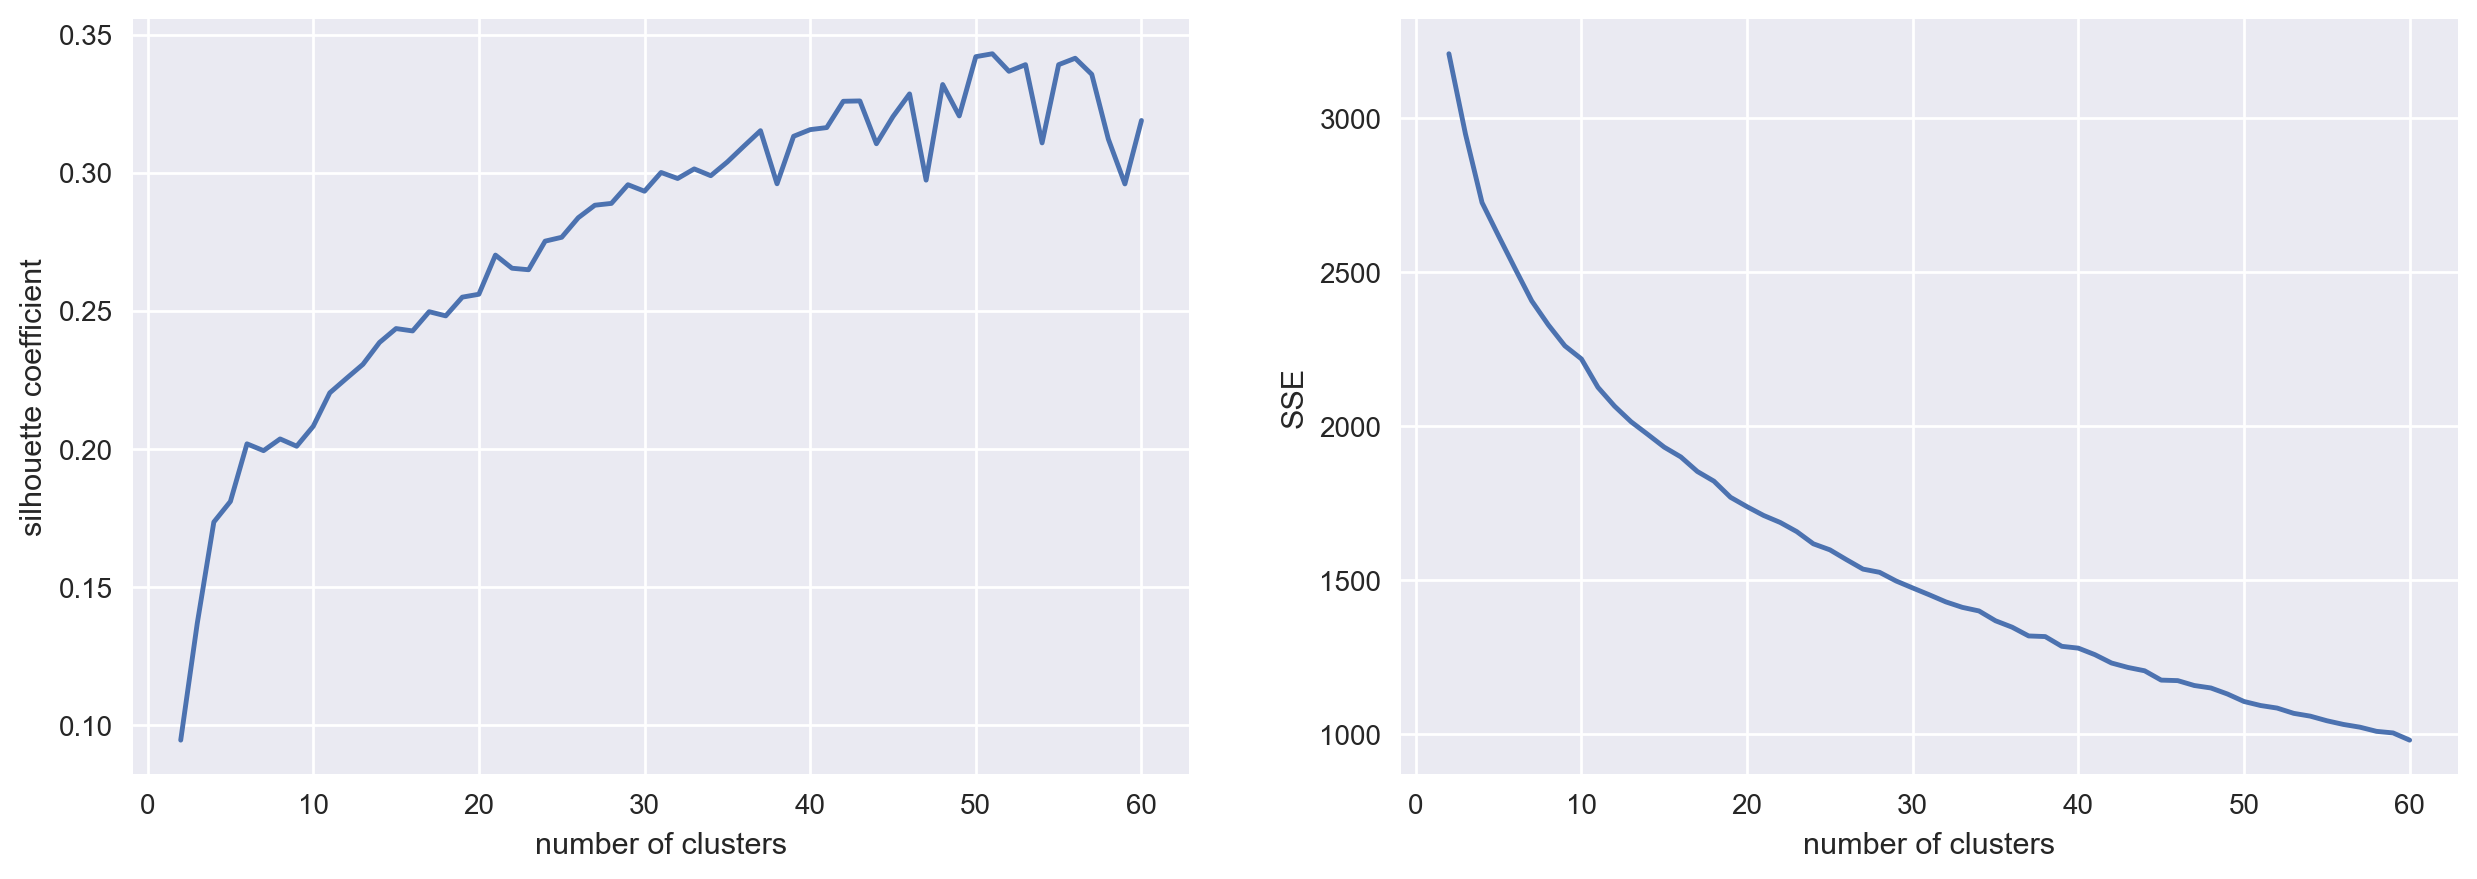

In [90]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,61)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [132]:
km = KMeans(n_clusters=50)
clusts = km.fit_predict(corpus_lsa)

In [133]:
len(clusts)

4092

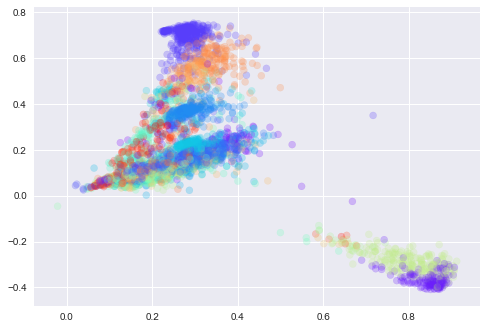

In [134]:
plt.scatter(corpus_lsa[:, 0], corpus_lsa[:, 1], c=clusts, cmap=plt.cm.rainbow, alpha=0.25)


In [135]:
from sklearn.manifold import TSNE
#Fits t-SNE for visualization
tsne = TSNE(n_components=2)
X_transformed = tsne.fit_transform(corpus_lsa)

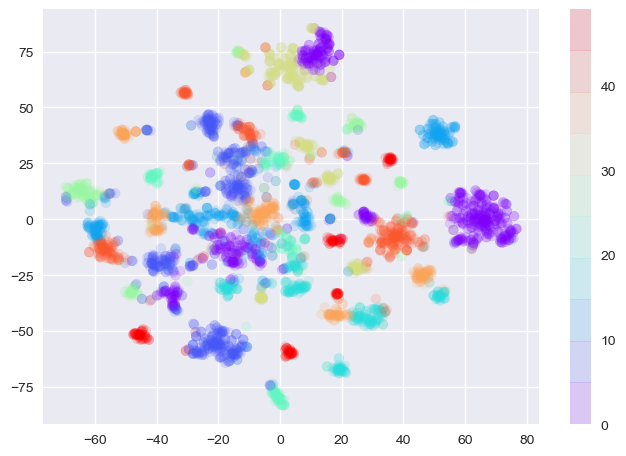

In [136]:
#Graphs t-SNE
plt.figure(dpi=100)

cmap = plt.cm.get_cmap('rainbow', 10)
plt.scatter(X_transformed[:, 0], X_transformed[:,1], c=clusts, cmap=cmap, alpha = 0.15)
#plt.xlim(-20,30)
#plt.ylim(-30,-10)
plt.colorbar()
plt.clim()

In [137]:
true_df['clusters'] = clusts

In [144]:
true_df.source.value_counts()

Info wars          515
Reuters            495
Mother Jones       455
Activist Post      420
National Review    418
Huffington Post    412
Alabama Today      385
Daily Beast        347
Breitbart          307
Global Research    190
Fox News           121
Associate Press     27
Name: source, dtype: int64

In [145]:
true_df.clusters.value_counts()

4     338
9     227
31    196
40    182
1     167
2     158
8     131
13    123
36    122
14    119
11    118
29    115
7     115
5     101
18     99
17     98
42     92
6      83
35     77
20     74
22     73
41     70
10     67
37     65
12     65
3      62
21     60
44     53
45     50
38     49
16     48
39     46
15     44
28     44
26     44
24     44
27     43
32     42
30     42
19     40
0      40
49     37
33     37
48     36
23     32
43     32
34     27
46     26
25     22
47     17
Name: clusters, dtype: int64

In [152]:
for x in range(49):
    largest = true_df['clusters'] == x
    clust_x_df = true_df[largest]
    print(clust_x_df.source.value_counts())

National Review    40
Name: source, dtype: int64
Mother Jones       60
Breitbart          44
Huffington Post    43
Daily Beast         8
Global Research     6
Reuters             3
National Review     3
Name: source, dtype: int64
Alabama Today    158
Name: source, dtype: int64
Activist Post      26
Global Research    15
Mother Jones       11
Breitbart           4
Daily Beast         4
Associate Press     1
National Review     1
Name: source, dtype: int64
Info wars    338
Name: source, dtype: int64
Mother Jones       39
Daily Beast        19
Huffington Post    18
Reuters            17
Info wars           3
National Review     2
Associate Press     1
Global Research     1
Activist Post       1
Name: source, dtype: int64
Daily Beast        30
Reuters            24
Mother Jones       22
Huffington Post     5
Info wars           1
National Review     1
Name: source, dtype: int64
Global Research    108
Huffington Post      4
Reuters              1
Breitbart            1
Mother Jones         

National Review    14
Huffington Post     6
Breitbart           4
Reuters             3
Mother Jones        3
Daily Beast         2
Info wars           2
Associate Press     1
Alabama Today       1
Name: source, dtype: int64

In [139]:
reference = true_df[['source','clusters']].pivot_table(index='clusters', columns='source', aggfunc=len)

In [140]:
reference

source,Activist Post,Alabama Today,Associate Press,Breitbart,Daily Beast,Fox News,Global Research,Huffington Post,Info wars,Mother Jones,National Review,Reuters
clusters,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN
1,NaN,NaN,NaN,44.0,8.0,NaN,6.0,43.0,NaN,60.0,3.0,3.0
2,NaN,158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26.0,NaN,1.0,4.0,4.0,NaN,15.0,NaN,NaN,11.0,1.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338.0,NaN,NaN,NaN
5,1.0,NaN,1.0,NaN,19.0,NaN,1.0,18.0,3.0,39.0,2.0,17.0
6,NaN,NaN,NaN,NaN,30.0,NaN,NaN,5.0,1.0,22.0,1.0,24.0
7,NaN,NaN,NaN,1.0,NaN,NaN,108.0,4.0,NaN,1.0,NaN,1.0
8,NaN,NaN,NaN,NaN,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
